In [1]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose

from MDS import *

pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

mds_from_d_3D = MDS(3,dissimilarity='euclidean')
mds_from_d_2D = MDS(2,dissimilarity='euclidean')


I check that I get the same 3D plot with my own MDSing and the MDS I got online. 

Fndamentally, it all comes from me not getting the same X matrix

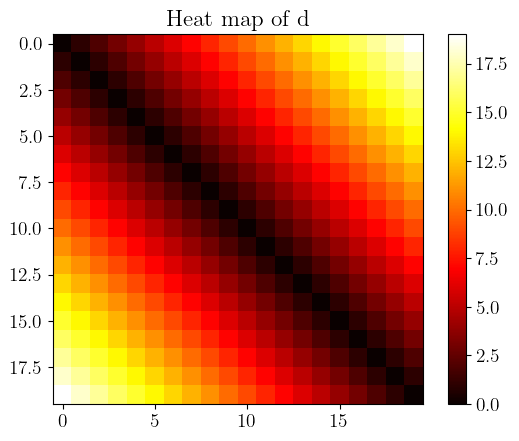

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


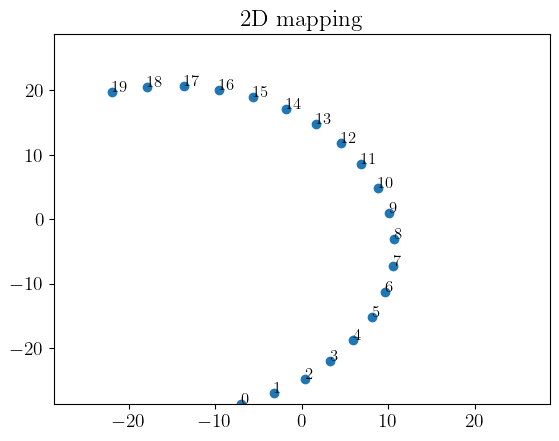

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

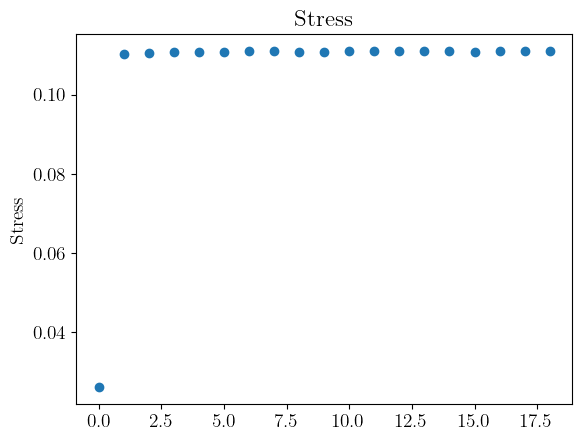

In [2]:
N=20
dab=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        dab[i][j]=abs(i-j)

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)

get_stress(dab)

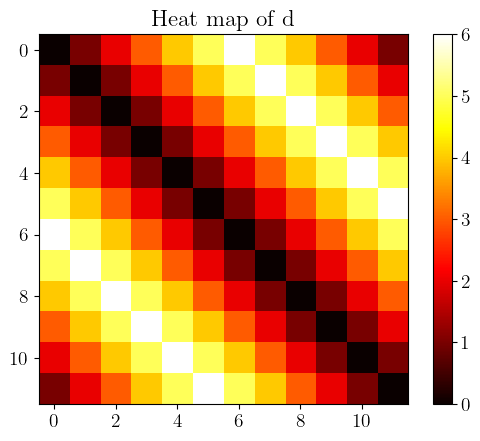

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



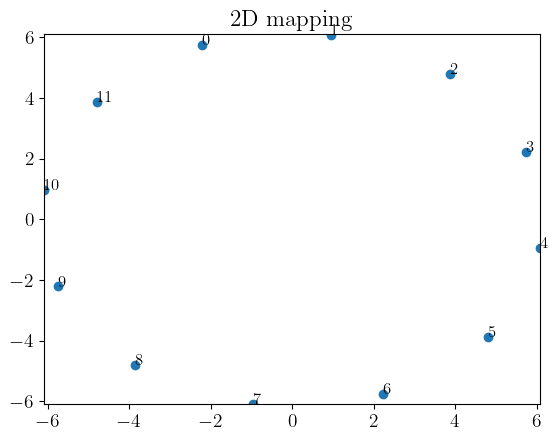

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

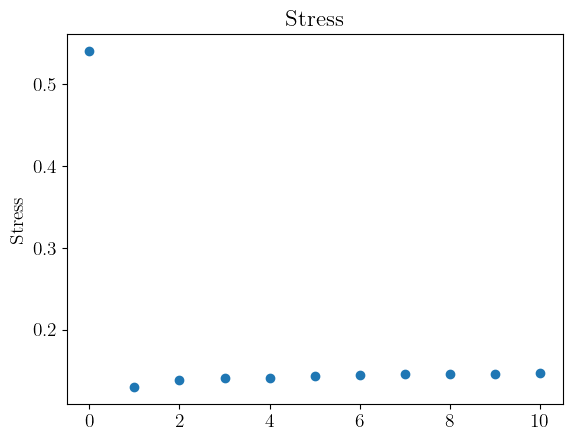

In [3]:
dab=ar([[0,1,2,3,4,5,6,5,4,3,2,1],[1,0,1,2,3,4,5,6,5,4,3,2],[2,1,0,1,2,3,4,5,6,5,4,3],[3,2,1,0,1,2,3,4,5,6,5,4],[4,3,2,1,0,1,2,3,4,5,6,5],[5,4,3,2,1,0,1,2,3,4,5,6],[6,5,4,3,2,1,0,1,2,3,4,5],[5,6,5,4,3,2,1,0,1,2,3,4],[4,5,6,5,4,3,2,1,0,1,2,3],[3,4,5,6,5,4,3,2,1,0,1,2],[2,3,4,5,6,5,4,3,2,1,0,1],[1,2,3,4,5,6,5,4,3,2,1,0]])

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)
get_stress(dab)

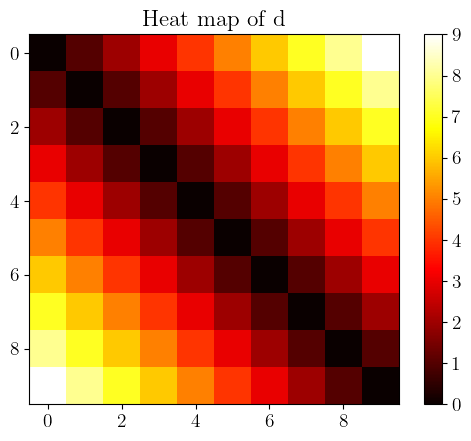

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



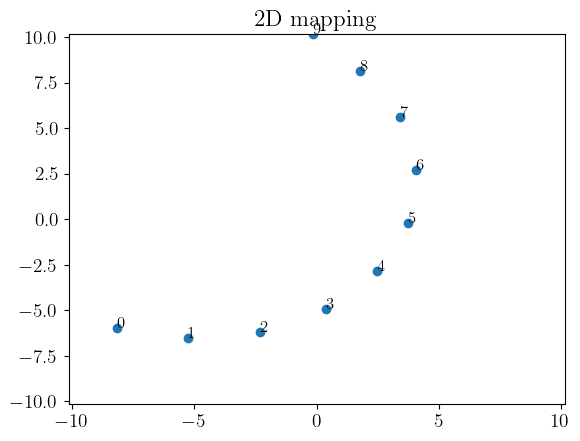

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

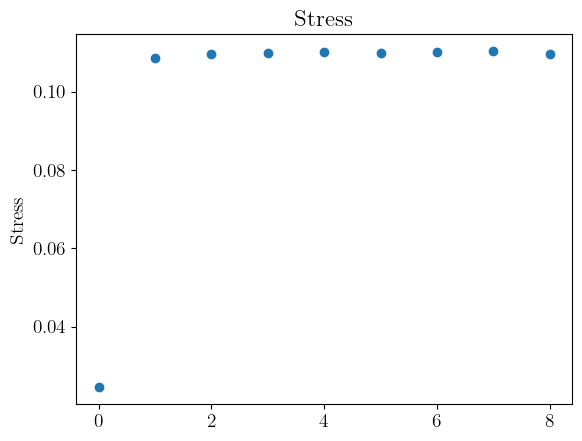

In [4]:
#dab=ar([[0,1,2,3,4,5,6,5,4,3,2,1],[1,0,1,2,3,4,5,6,5,4,3,2],[2,1,0,1,2,3,4,5,6,5,4,3],[3,2,1,0,1,2,3,4,5,6,5,4],[4,3,2,1,0,1,2,3,4,5,6,5],[5,4,3,2,1,0,1,2,3,4,5,6],[6,5,4,3,2,1,0,1,2,3,4,5],[5,6,5,4,3,2,1,0,1,2,3,4],[4,5,6,5,4,3,2,1,0,1,2,3],[3,4,5,6,5,4,3,2,1,0,1,2],[2,3,4,5,6,5,4,3,2,1,0,1],[1,2,3,4,5,6,5,4,3,2,1,0]])
dab=ar([[0,1,2,3,4,5,6,7,8,9],[1,0,1,2,3,4,5,6,7,8],[2,1,0,1,2,3,4,5,6,7],[3,2,1,0,1,2,3,4,5,6],[4,3,2,1,0,1,2,3,4,5],[5,4,3,2,1,0,1,2,3,4],[6,5,4,3,2,1,0,1,2,3],[7,6,5,4,3,2,1,0,1,2],[8,7,6,5,4,3,2,1,0,1],[9,8,7,6,5,4,3,2,1,0]], dtype=np.float32)

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



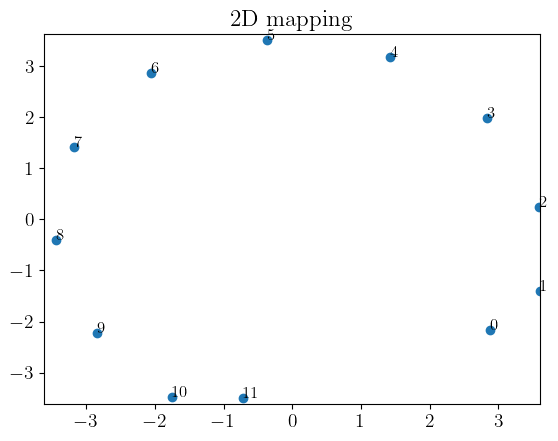

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

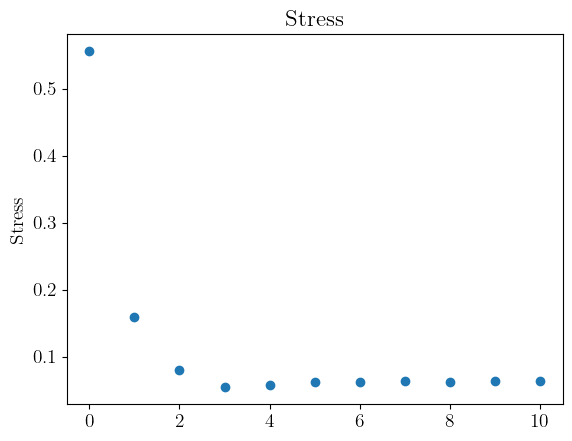

In [5]:
file_name="bell_superp_no_BC"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



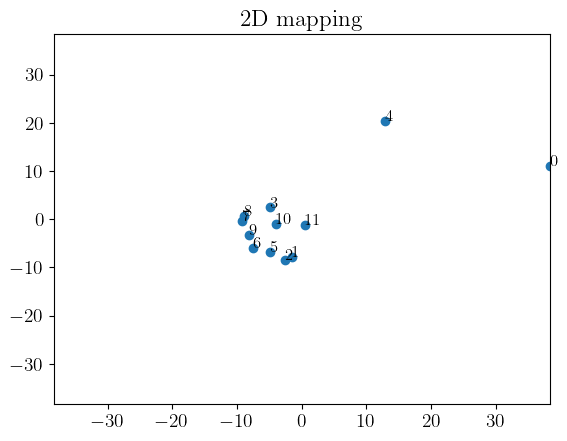

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

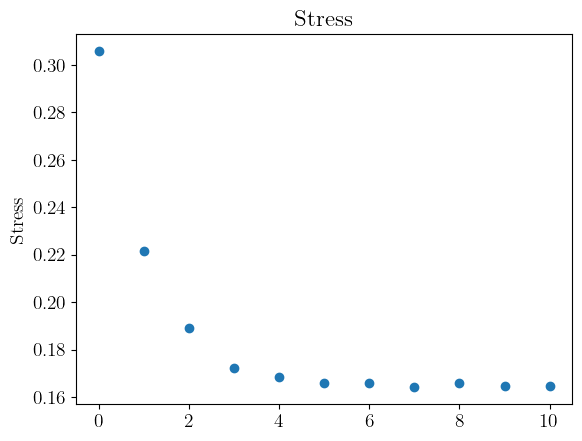

In [6]:
file_name="couplings_J_avg"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



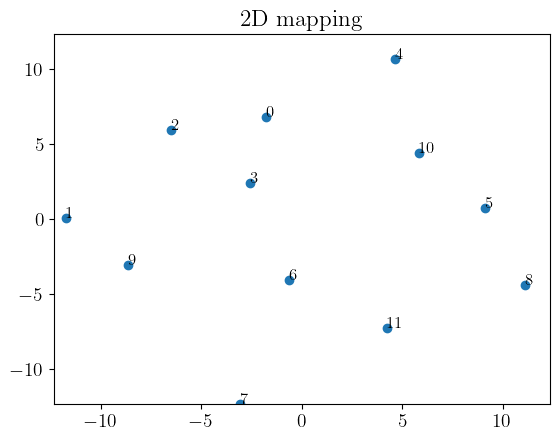

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

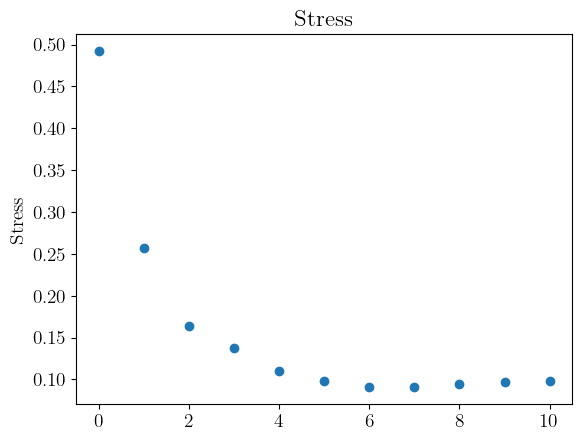

In [7]:
file_name="couplings_12_0"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



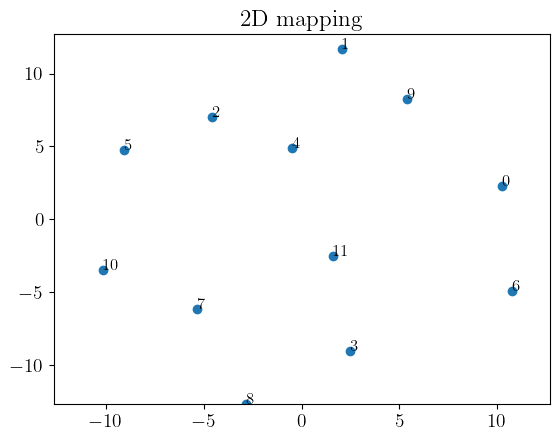

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

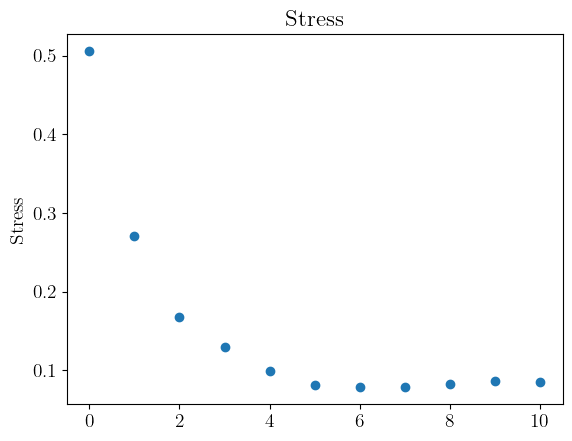

In [8]:
file_name="couplings_12_1"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



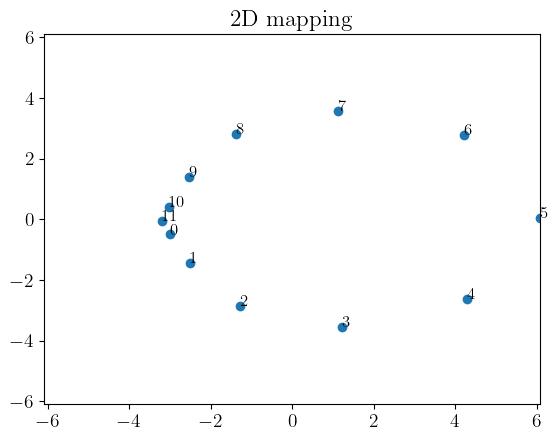

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

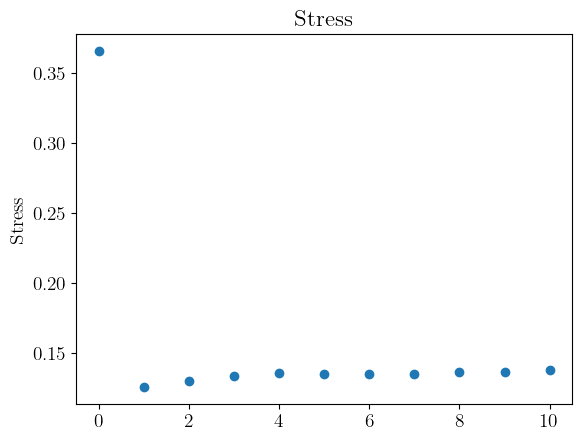

In [9]:
file_name="thermal_20"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



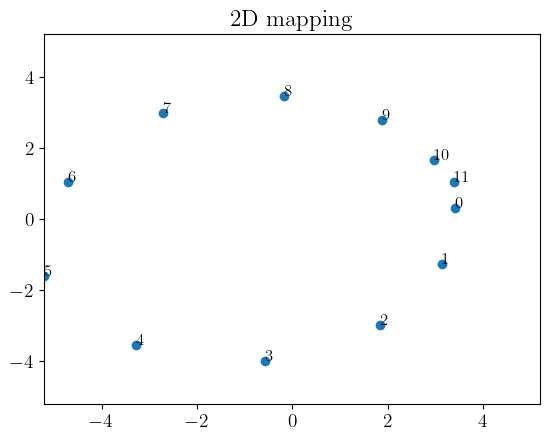

In [11]:
file_name="thermal_8"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



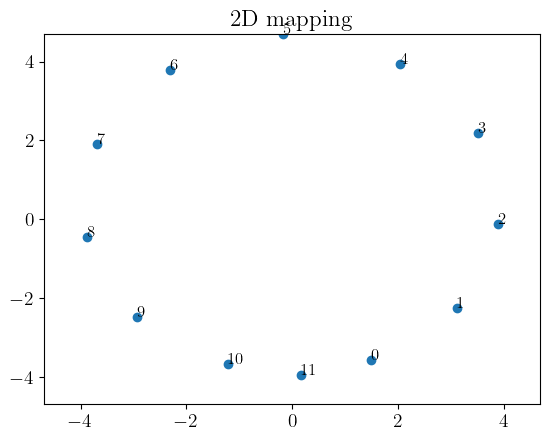

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

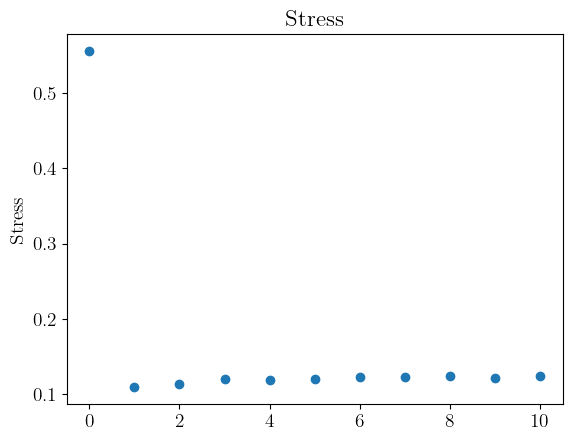

In [10]:
file_name="thermal_3"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



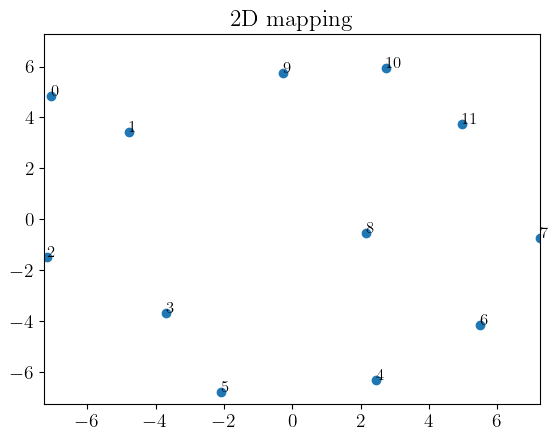

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

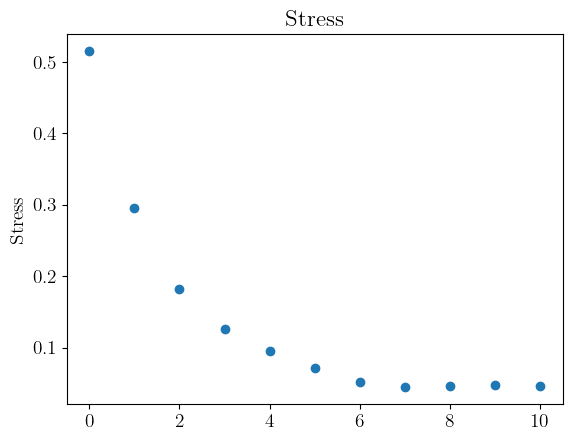

In [48]:
N = 12
k = 0
folder = 'goe_xxyyzz'
state_number=0
file_name=folder+f"{N}_{k}_{state_number}"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

In [50]:
X_3=mds_from_d_3D.fit_transform(dab)
m=np.max(abs(X_3))
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    # Calculate the residuals
    fittedX = C[0]
    fittedY = C[1]
    fittedZ = C[2]
    fitted_radius = radius

    residuals = np.sqrt((spX - fittedX)**2 + (spY - fittedY)**2 + (spZ - fittedZ)**2) - fitted_radius
    rmse = np.sqrt(np.mean(residuals**2))

    return radius, C[0], C[1], C[2], rmse

correctX=X_3[:,0]/m
correctY=X_3[:,1]/m
correctZ=X_3[:,2]/m
r,x0,y0,z0, rmse=sphereFit(X_3[:,0]/m,X_3[:,1]/m,X_3[:,2]/m)
print(rmse)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r
y = np.sin(u) * np.sin(v) * r
z = np.cos(v) * r
x = x + x0
y = y + y0
z = z + z0

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=correctX, y=correctY, z=correctZ,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

num_points = len(correctX)
randomX = np.random.uniform(-1, 1, num_points)
randomY = np.random.uniform(-1, 1, num_points)
randomZ = np.random.uniform(-1, 1, num_points)

max_randomX = np.max(abs(randomX))
max_randomY = np.max(abs(randomY))
max_randomZ = np.max(abs(randomZ))
X_temp=[max_randomX]+[max_randomY]+[max_randomZ]
m1=np.max(X_temp)

r_rand, x0_rand, y0_rand, z0_rand, rmse_rand = sphereFit(randomX/m1, randomY/m1, randomZ/m1)
print(rmse_rand)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r_rand
y = np.sin(u) * np.sin(v) * r_rand
z = np.cos(v) * r_rand
x = x + x0_rand
y = y + y0_rand
z = z + z0_rand

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=randomX/m1, y=randomY/m1, z=randomZ/m1,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



0.07171204115949237


/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/168801051.py:17: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/168801051.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



0.2912482586323754


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



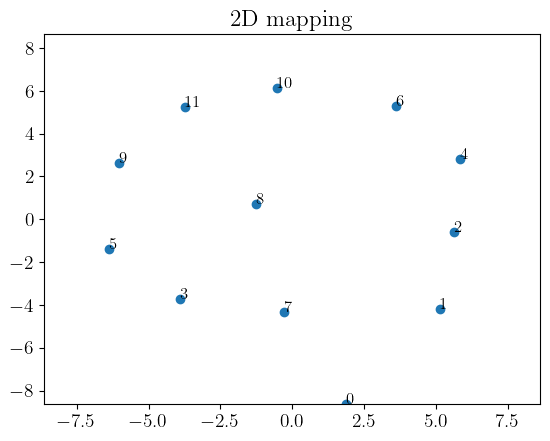

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

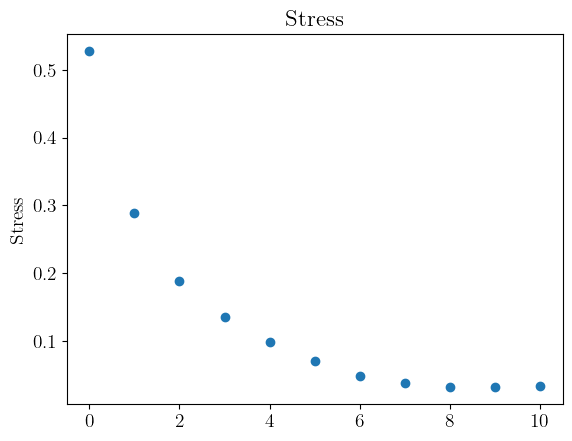

In [57]:
N = 12
k = 1
folder = 'goe_xxyyzz'
state_number=0
file_name=folder+f"{N}_{k}_{state_number}"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

In [58]:
X_3=mds_from_d_3D.fit_transform(dab)
m=np.max(abs(X_3))
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    # Calculate the residuals
    fittedX = C[0]
    fittedY = C[1]
    fittedZ = C[2]
    fitted_radius = radius

    residuals = np.sqrt((spX - fittedX)**2 + (spY - fittedY)**2 + (spZ - fittedZ)**2) - fitted_radius
    rmse = np.sqrt(np.mean(residuals**2))

    return radius, C[0], C[1], C[2], rmse

correctX=X_3[:,0]/m
correctY=X_3[:,1]/m
correctZ=X_3[:,2]/m
r,x0,y0,z0, rmse=sphereFit(X_3[:,0]/m,X_3[:,1]/m,X_3[:,2]/m)
print(rmse)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r
y = np.sin(u) * np.sin(v) * r
z = np.cos(v) * r
x = x + x0
y = y + y0
z = z + z0

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=correctX, y=correctY, z=correctZ,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

num_points = len(correctX)
randomX = np.random.uniform(-1, 1, num_points)
randomY = np.random.uniform(-1, 1, num_points)
randomZ = np.random.uniform(-1, 1, num_points)

max_randomX = np.max(abs(randomX))
max_randomY = np.max(abs(randomY))
max_randomZ = np.max(abs(randomZ))
X_temp=[max_randomX]+[max_randomY]+[max_randomZ]
m1=np.max(X_temp)

r_rand, x0_rand, y0_rand, z0_rand, rmse_rand = sphereFit(randomX/m1, randomY/m1, randomZ/m1)
print(rmse_rand)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r_rand
y = np.sin(u) * np.sin(v) * r_rand
z = np.cos(v) * r_rand
x = x + x0_rand
y = y + y0_rand
z = z + z0_rand

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=randomX/m1, y=randomY/m1, z=randomZ/m1,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

0.07552679199088096


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/168801051.py:17: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/168801051.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



0.18913473619792961


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



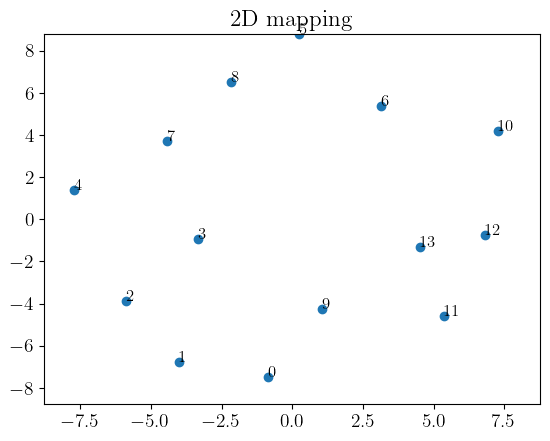

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

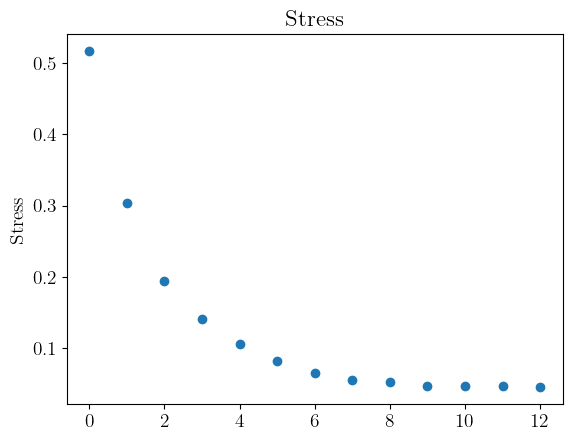

In [39]:
N = 14
k = 0
folder = 'goe_local2'
state_number=0
file_name=folder+f"{N}_{k}_{state_number}"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

In [44]:
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
#   3D plot of the
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_3=mds_from_d_3D.fit_transform(dab)
m=np.max(abs(X_3))
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    # Calculate the residuals
    fittedX = C[0]
    fittedY = C[1]
    fittedZ = C[2]
    fitted_radius = radius

    residuals = np.sqrt((spX - fittedX)**2 + (spY - fittedY)**2 + (spZ - fittedZ)**2) - fitted_radius
    rmse = np.sqrt(np.mean(residuals**2))

    return radius, C[0], C[1], C[2], rmse

correctX=X_3[:,0]/m
correctY=X_3[:,1]/m
correctZ=X_3[:,2]/m
r,x0,y0,z0, rmse=sphereFit(X_3[:,0]/m,X_3[:,1]/m,X_3[:,2]/m)
print(rmse)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r
y = np.sin(u) * np.sin(v) * r
z = np.cos(v) * r
x = x + x0
y = y + y0
z = z + z0

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=correctX, y=correctY, z=correctZ,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

num_points = len(correctX)
randomX = np.random.uniform(-1, 1, num_points)
randomY = np.random.uniform(-1, 1, num_points)
randomZ = np.random.uniform(-1, 1, num_points)

max_randomX = np.max(abs(randomX))
max_randomY = np.max(abs(randomY))
max_randomZ = np.max(abs(randomZ))
X_temp=[max_randomX]+[max_randomY]+[max_randomZ]
m1=np.max(X_temp)

r_rand, x0_rand, y0_rand, z0_rand, rmse_rand = sphereFit(randomX/m1, randomY/m1, randomZ/m1)
print(rmse_rand)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r_rand
y = np.sin(u) * np.sin(v) * r_rand
z = np.cos(v) * r_rand
x = x + x0_rand
y = y + y0_rand
z = z + z0_rand

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=randomX/m1, y=randomY/m1, z=randomZ/m1,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

0.07288289282929693


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:24: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:28: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



0.2939148131068709


In [64]:
rmse_list=[]
for i in range(10000):

    num_points = len(correctX)
    randomX = np.random.uniform(-1, 1, num_points)
    randomY = np.random.uniform(-1, 1, num_points)
    randomZ = np.random.uniform(-1, 1, num_points)

    max_randomX = np.max(abs(randomX))
    max_randomY = np.max(abs(randomY))
    max_randomZ = np.max(abs(randomZ))
    X_temp=[max_randomX]+[max_randomY]+[max_randomZ]
    m1=np.max(X_temp)

    r_rand, x0_rand, y0_rand, z0_rand, rmse_rand = sphereFit(randomX/m1, randomY/m1, randomZ/m1)
    rmse_list.append(rmse_rand)

#print(rmse_list)
print(rmse_rand.mean())

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:24: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:28: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



0.2126066254842694


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



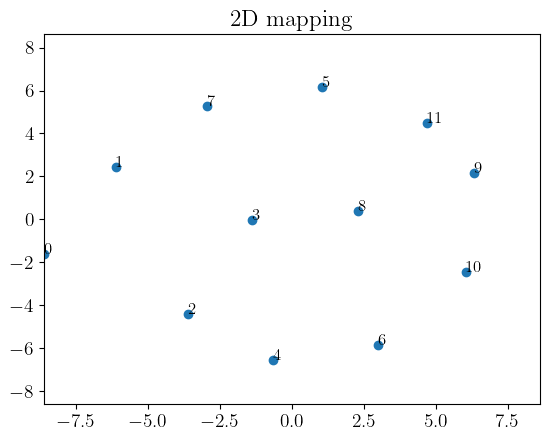

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

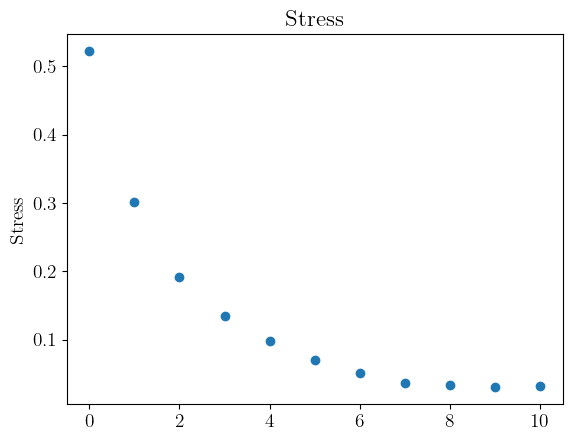

In [59]:
N = 12
folder = 'goe_xxyyzz'
state_number=0
file_name=folder+f"{N}_avg_{state_number}"
dab=load_d(file_name)
mapData(dab)
get_stress(dab)

In [60]:
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
#   3D plot of the
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_3=mds_from_d_3D.fit_transform(dab)
m=np.max(abs(X_3))
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    # Calculate the residuals
    fittedX = C[0]
    fittedY = C[1]
    fittedZ = C[2]
    fitted_radius = radius

    residuals = np.sqrt((spX - fittedX)**2 + (spY - fittedY)**2 + (spZ - fittedZ)**2) - fitted_radius
    rmse = np.sqrt(np.mean(residuals**2))

    return radius, C[0], C[1], C[2], rmse

correctX=X_3[:,0]/m
correctY=X_3[:,1]/m
correctZ=X_3[:,2]/m
r,x0,y0,z0, rmse=sphereFit(X_3[:,0]/m,X_3[:,1]/m,X_3[:,2]/m)
print(rmse)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r
y = np.sin(u) * np.sin(v) * r
z = np.cos(v) * r
x = x + x0
y = y + y0
z = z + z0

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=correctX, y=correctY, z=correctZ,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

num_points = len(correctX)
randomX = np.random.uniform(-1, 1, num_points)
randomY = np.random.uniform(-1, 1, num_points)
randomZ = np.random.uniform(-1, 1, num_points)

max_randomX = np.max(abs(randomX))
max_randomY = np.max(abs(randomY))
max_randomZ = np.max(abs(randomZ))
X_temp=[max_randomX]+[max_randomY]+[max_randomZ]
m1=np.max(X_temp)

r_rand, x0_rand, y0_rand, z0_rand, rmse_rand = sphereFit(randomX/m1, randomY/m1, randomZ/m1)
print(rmse_rand)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v) * r_rand
y = np.sin(u) * np.sin(v) * r_rand
z = np.cos(v) * r_rand
x = x + x0_rand
y = y + y0_rand
z = z + z0_rand

# Creating the 3D scatter plot for the points
scatter_points = go.Scatter3d(
    x=randomX/m1, y=randomY/m1, z=randomZ/m1,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Creating the 3D wireframe for the sphere
sphere_wireframe = go.Surface(
    x=x, y=y, z=z,
    colorscale='reds',
    showscale=False,
    opacity=0.5,
    name='Fitted Sphere'
)

# Creating the figure
fig = go.Figure(data=[scatter_points, sphere_wireframe])

# Updating layout for aspect ratio and axis labels
fig.update_layout(
    scene=dict(
        aspectmode='data',
        xaxis=dict(range=[-1, 1]),
        yaxis=dict(range=[-1, 1]),
        zaxis=dict(range=[-1, 1])
    ),
    title='3D Plot of Fitted Sphere'
)

# Showing the plot
fig.show()

0.10322355371661308


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:24: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_5360/1276046532.py:28: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



0.2437626508799998
